In [3]:
# import pretty_confusion_matrix as pcm
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# from src.features.evaluation_utils import ConfusionMatrix, PredictionIoU
from src.models.model_builder import Model
from src.features.dataset import Dataset
from src.visualization.visualize import PredictionMasks


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ABS_PATH = %pwd

notebook_path = [idx for idx,ch in enumerate(ABS_PATH) if ch=='/']
notebooks_level_in_the_project = 2

project_path = ABS_PATH[:notebook_path[-notebooks_level_in_the_project]]
WEIGHTS_FILEPATH = project_path + "/notebooks/exploratory/results/DeepLabv3+/9.1_modified_deeplab/best_dice_loss/checkpoint"

In [18]:
# download best weights
import gdown
import os

NOTEBOOK_PATH = %pwd

best_weights_path = NOTEBOOK_PATH + "/best_miou_score_weights"

URL = "https://drive.google.com/drive/folders/1MyJ0_lQxBW7ekOzuVaBG4BRIpbaA-7xj?usp=share_link"

if not os.path.exists(best_weights_path):
    print("Downloading best weights.")
    gdown.download_folder(
        url=URL,
        output=NOTEBOOK_PATH,
        quiet=True,
        use_cookies=False
    )
    print("Finished.")
else:
    print("Best weights are already downloaded.")

Best weights are already downloaded.


In [21]:
DATA_DIR = project_path + "/data/processed/"
BATCH_SIZE = 2
IMG_HEIGHT = 512
IMG_WIDTH = 512
NUM_CLASSES = 5


model_creator = Model(IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES)
model = model_creator.get_deeplab_model(
    weights="cityscapes",
    freeze_layers=True,
    custom_freeze_border=359,
    activation="softmax",
)

checkpoint_filepath = best_weights_path + "/checkpoint"

model.load_weights(checkpoint_filepath)
landcover_dataset = Dataset(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, NUM_CLASSES, BATCH_SIZE)
train_dataset, val_dataset, test_dataset = landcover_dataset.generate_datasets()

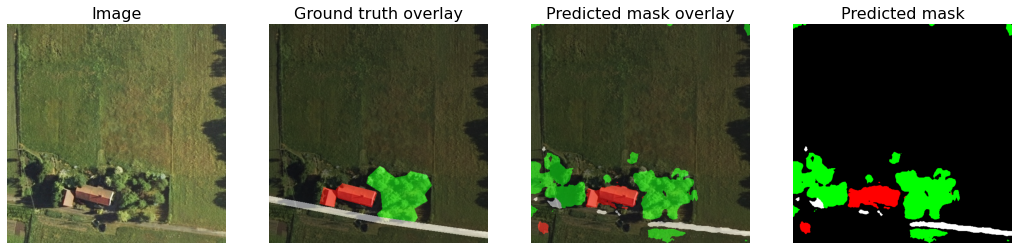

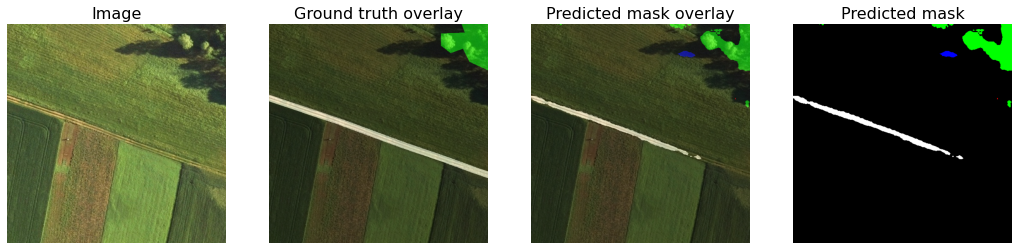

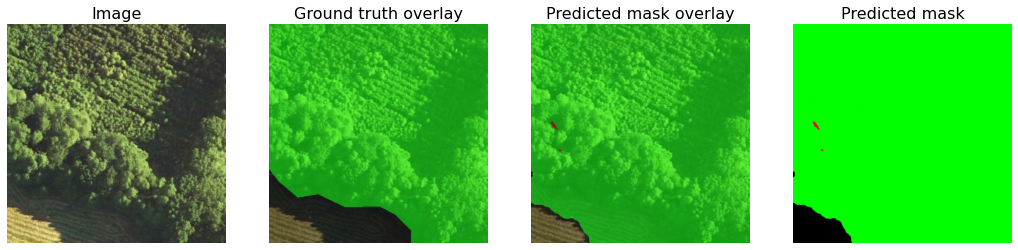

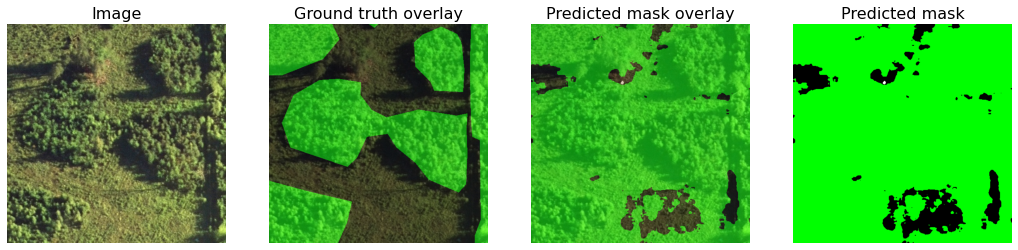

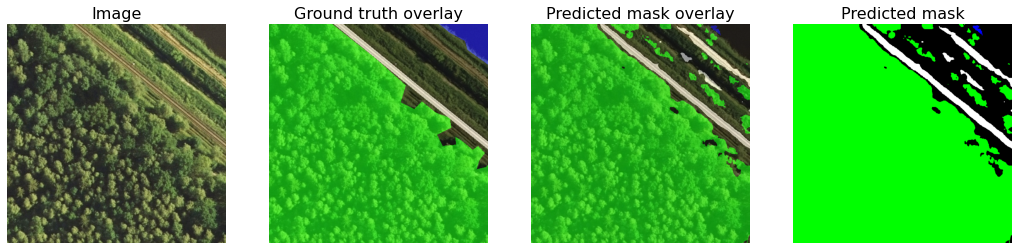

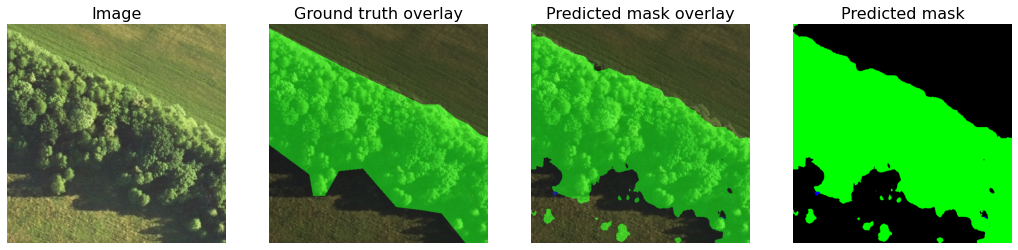

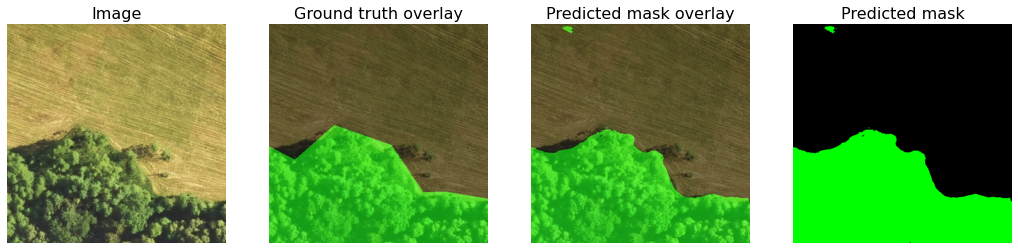

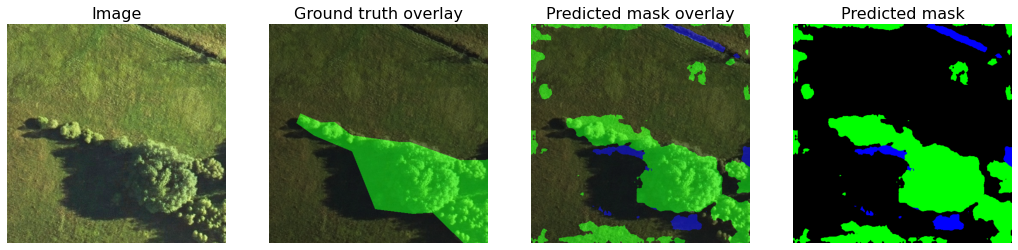

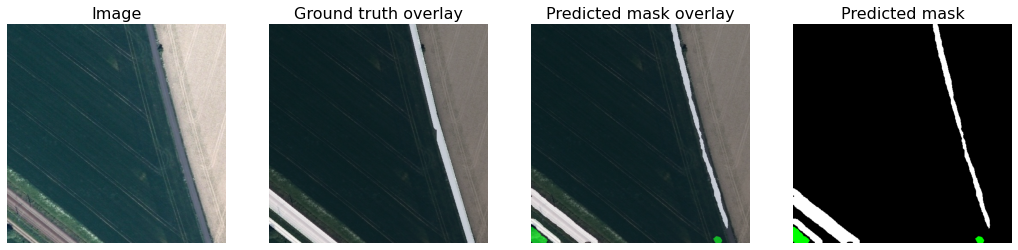

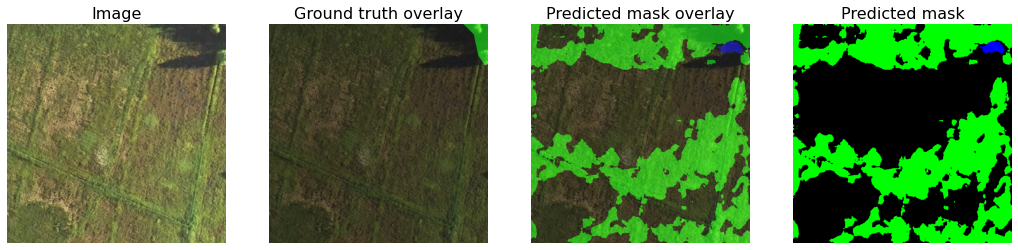

In [22]:
PredictionMasks(model, landcover_dataset, NUM_CLASSES).display_overlay_predictions_for_test_set(10)